In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
df = pd.read_excel('lines.xlsx')
df

,year,name,metre,line
0,1912,УТРО,я4м,Угрю<мый| до<ждь| скоси<л| глаза<.|
1,1912,УТРО,я3ж,А за<| реше<ткой| че<ткой|
2,1912,УТРО,я4м,желе<зной| мы<сли| проводо<в| ―
3,1912,УТРО,я1ж,пери<на.|
4,1912,УТРО,я4м,И на<| нее<| встаю<щих| зве<зд|
...,...,...,...,...
3349,1930,БЕЗЫМЕНСКОМУ,я4ж,коне<ц| несча<стного| убы<стрил.|
3350,1930,АДУЕВУ,я4м,Я скандали<ст!| Я не мона<х.|
3351,1930,АДУЕВУ,я4д,Но ка<к| под но<готь| взя<ть| Аду<ева?|
3352,1930,АДУЕВУ,я4м,"Ищу<| у о<блака| в штана<х,|"


In [232]:
poems = []
metres_in_poems = []
for i in range(0, len(df)):
  current_poem = df['name'][i]
  if current_poem not in poems:
    poems.append(current_poem)
    poem_metres = set()
    for n in range(0, len(df)):
      if df['name'][n] == current_poem:
        poem_metres.add(df['metre'][n])
    metres_in_poems.append(poem_metres)
metres_by_poem = pd.DataFrame({'poem': poems,'metre': metres_in_poems})
metres_by_poem

,poem,metre
0,УТРО,"{я2м, я3ж, я3м, я4м, я1ж, я2ж, я5ж, я6ж}"
1,ПОРТ,"{я4ж, я4м}"
2,НОЧЬ,"{ам4ж, д4ж}"
3,УЛИЧНОЕ,"{я4ж, я4м}"
4,ТЕАТРЫ,"{я4ж, я4м}"
...,...,...
84,ПОДВОДНЫЙ КОМСОМОЛЕЦ,"{я3ж, я4м}"
85,НОВЫЙ ТИП,"{х4ж, х4м}"
86,ГАНДУРИНУ,{я4ж}
87,БЕЗЫМЕНСКОМУ,"{я4ж, я4д}"


In [233]:
metre_counts = df['metre'].value_counts().to_frame().reset_index()
frequent_metres = []
for i in range(0, len(metre_counts)):
  if metre_counts['count'][i] >= 10:
    frequent_metres.append(metre_counts['metre'][i])

In [234]:
group_metres = []
for i in range(0, len(df)):
  if df['metre'][i] in frequent_metres:
    group_metres.append(df['metre'][i])
  else:
    group_metres.append('Другие')
df['group_metres'] = group_metres
df

,year,name,metre,line,group_metres
0,1912,УТРО,я4м,Угрю<мый| до<ждь| скоси<л| глаза<.|,я4м
1,1912,УТРО,я3ж,А за<| реше<ткой| че<ткой|,я3ж
2,1912,УТРО,я4м,желе<зной| мы<сли| проводо<в| ―,я4м
3,1912,УТРО,я1ж,пери<на.|,Другие
4,1912,УТРО,я4м,И на<| нее<| встаю<щих| зве<зд|,я4м
...,...,...,...,...,...
3349,1930,БЕЗЫМЕНСКОМУ,я4ж,коне<ц| несча<стного| убы<стрил.|,я4ж
3350,1930,АДУЕВУ,я4м,Я скандали<ст!| Я не мона<х.|,я4м
3351,1930,АДУЕВУ,я4д,Но ка<к| под но<готь| взя<ть| Аду<ева?|,я4д
3352,1930,АДУЕВУ,я4м,"Ищу<| у о<блака| в штана<х,|",я4м


In [235]:
new_poems = []
new_metres_in_poems = []
for i in range(0, len(df)):
  current_poem = df['name'][i]
  if current_poem not in new_poems:
    new_poems.append(current_poem)
    new_poem_metres = set()
    for n in range(0, len(df)):
      if df['name'][n] == current_poem:
        new_poem_metres.add(df['group_metres'][n])
    new_metres_in_poems.append(new_poem_metres)
final_metres_by_poem = pd.DataFrame({'poem': new_poems,'metre': new_metres_in_poems})
final_metres_by_poem

,poem,metre
0,УТРО,"{я2м, я3ж, я3м, я4м, я2ж, я5ж, Другие, я6ж}"
1,ПОРТ,"{я4ж, я4м}"
2,НОЧЬ,"{Другие, ам4ж}"
3,УЛИЧНОЕ,"{я4ж, я4м}"
4,ТЕАТРЫ,"{я4ж, я4м}"
...,...,...
84,ПОДВОДНЫЙ КОМСОМОЛЕЦ,"{я3ж, я4м}"
85,НОВЫЙ ТИП,"{х4ж, х4м}"
86,ГАНДУРИНУ,{я4ж}
87,БЕЗЫМЕНСКОМУ,"{я4ж, я4д}"


In [236]:
all_groups = list(set(df['group_metres']))
all_groups

['д2ж',
 'х3д',
 'х6ж',
 'я2ж',
 'х4ж',
 'я4д',
 'х5ж',
 'я4м',
 'х4м',
 'х7м',
 'ан2м',
 'х3ж',
 'я5м',
 'Другие',
 'я6м',
 'я4ж',
 'другое ж',
 'я2м',
 'х6м',
 'я3м',
 'х4д',
 'х5д',
 'я5ж',
 'я3д',
 'ам4ж',
 'другое м',
 'я6ж',
 'х5м',
 'я3ж',
 'ам3ж',
 'ам2ж']

In [237]:
metres_matrix = pd.DataFrame(index=all_groups, columns=all_groups)
for i in all_groups:
  for j in all_groups:
    metres_matrix.loc[i, j] = 0
for i in range(0, len(final_metres_by_poem)):
  metres = final_metres_by_poem['metre'][i]
  metres_list = list(metres)
  for n1 in range(0, len(metres_list)):
    for n2 in range(n1 + 1, len(metres_list)):
      metre1 = metres_list[n1]
      metre2 = metres_list[n2]
      if metre1 in all_groups and metre2 in all_groups:
        metres_matrix.loc[metre1, metre2] += 1
        metres_matrix.loc[metre2, metre1] += 1
metres_matrix

,д2ж,х3д,х6ж,я2ж,х4ж,я4д,х5ж,я4м,х4м,х7м,...,х5д,я5ж,я3д,ам4ж,другое м,я6ж,х5м,я3ж,ам3ж,ам2ж
д2ж,0,6,0,2,4,1,0,2,4,0,...,0,0,4,0,1,0,0,4,0,3
х3д,6,0,0,2,15,2,0,5,17,0,...,1,0,10,0,3,0,0,7,0,3
х6ж,0,0,0,0,5,0,10,2,2,9,...,3,2,0,1,4,1,10,1,1,0
я2ж,2,2,0,0,2,0,0,3,2,0,...,0,1,3,0,1,1,0,4,0,3
х4ж,4,15,5,2,0,2,6,6,29,4,...,4,2,11,1,4,2,5,9,0,1
я4д,1,2,0,0,2,0,0,7,2,0,...,0,0,5,0,1,0,0,4,0,1
х5ж,0,0,10,0,6,0,0,2,2,8,...,3,1,0,2,4,1,11,0,1,0
я4м,2,5,2,3,6,7,2,0,6,0,...,0,3,18,2,4,2,2,18,0,5
х4м,4,17,2,2,29,2,2,6,0,1,...,2,1,11,1,4,1,2,9,0,1
х7м,0,0,9,0,4,0,8,0,1,0,...,3,1,0,0,2,0,8,0,1,0


In [238]:
frequency_dict = {}
for i in all_groups:
  count = 0
  for n in range(0, len(final_metres_by_poem)):
    metres_set = final_metres_by_poem['metre'][n]
    if i in metres_set:
      count += 1
  frequency_dict[i] = count
frequency_matrix = pd.Series(frequency_dict)
frequency_matrix

,0
д2ж,7
х3д,20
х6ж,12
я2ж,6
х4ж,33
я4д,9
х5ж,12
я4м,34
х4м,31
х7м,9


In [239]:
conditional_probability_matrix = pd.DataFrame(index = all_metre_groups, columns = all_metre_groups)
for i in all_groups:
  for n in all_groups:
    conditional_probability_matrix.loc[i, n] = 0.0
for i in all_groups:
  frequency_i = frequency_matrix.get(i, 0)
  if frequency_i > 0:
    for n in all_groups:
      if i in metres_matrix.index and n in metres_matrix.columns:
        conditional_probability_i_n = metres_matrix.loc[i, n]
      else:
        conditional_probability_i_n = 0
      conditional_probability_matrix.loc[i, n] = conditional_probability_i_n / frequency_i
  else:
    for n in all_groups:
      conditional_probability_matrix.loc[i, n] = 0.0
for x in range(0, len(conditional_probability_matrix.index)):
  metre_name = conditional_probability_matrix.index[x]
  conditional_probability_matrix.loc[metre_name, metre_name] = 1.0
conditional_probability_matrix

,Другие,ам2ж,ам3ж,ам4ж,ан2м,д2ж,другое ж,другое м,х3д,х3ж,...,я3д,я3ж,я3м,я4д,я4ж,я4м,я5ж,я5м,я6ж,я6м
Другие,1.0,0.12766,0.021277,0.06383,0.12766,0.12766,0.212766,0.234043,0.276596,0.212766,...,0.404255,0.361702,0.234043,0.106383,0.12766,0.297872,0.191489,0.170213,0.148936,0.148936
ам2ж,0.857143,1.0,0.0,0.0,0.142857,0.428571,0.0,0.142857,0.428571,0.428571,...,0.857143,0.857143,0.428571,0.142857,0.0,0.714286,0.0,0.142857,0.0,0.0
ам3ж,0.5,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ам4ж,0.75,0.0,0.0,1.0,0.0,0.0,0.25,0.5,0.0,0.0,...,0.25,0.0,0.25,0.0,0.0,0.5,0.0,0.0,0.0,0.0
ан2м,0.857143,0.142857,0.0,0.0,1.0,0.428571,0.285714,0.285714,1.0,1.0,...,0.571429,0.285714,0.142857,0.142857,0.142857,0.285714,0.0,0.0,0.0,0.0
д2ж,0.857143,0.428571,0.0,0.0,0.428571,1.0,0.142857,0.142857,0.857143,0.857143,...,0.571429,0.571429,0.142857,0.142857,0.142857,0.285714,0.0,0.0,0.0,0.0
другое ж,0.833333,0.0,0.083333,0.083333,0.166667,0.083333,1.0,0.333333,0.333333,0.166667,...,0.5,0.333333,0.083333,0.166667,0.25,0.333333,0.166667,0.166667,0.166667,0.166667
другое м,0.846154,0.076923,0.076923,0.153846,0.153846,0.076923,0.307692,1.0,0.230769,0.153846,...,0.307692,0.307692,0.153846,0.076923,0.153846,0.307692,0.307692,0.230769,0.230769,0.230769
х3д,0.65,0.15,0.0,0.0,0.35,0.3,0.2,0.15,1.0,0.7,...,0.5,0.35,0.05,0.1,0.1,0.25,0.0,0.0,0.0,0.0
х3ж,0.588235,0.176471,0.0,0.0,0.411765,0.352941,0.117647,0.117647,0.823529,1.0,...,0.588235,0.470588,0.058824,0.117647,0.176471,0.352941,0.0,0.0,0.0,0.0


In [240]:
sorted_metres = frequency_matrix.sort_values(ascending = False).index
sorted_conditional_probability = conditional_probability_matrix.loc[sorted_metres, sorted_metres]
sorted_conditional_probability

,Другие,я4м,х4ж,х4м,я3ж,я3д,я4ж,х3д,х3ж,я3м,...,я6ж,я6м,д2ж,ан2м,ам2ж,я2ж,я2м,х5д,ам4ж,ам3ж
Другие,1.0,0.297872,0.489362,0.404255,0.361702,0.404255,0.12766,0.276596,0.212766,0.234043,...,0.148936,0.148936,0.12766,0.12766,0.12766,0.12766,0.12766,0.085106,0.06383,0.021277
я4м,0.411765,1.0,0.176471,0.176471,0.529412,0.529412,0.441176,0.147059,0.176471,0.235294,...,0.058824,0.029412,0.058824,0.058824,0.147059,0.088235,0.058824,0.0,0.058824,0.0
х4ж,0.69697,0.181818,1.0,0.878788,0.272727,0.333333,0.151515,0.454545,0.333333,0.060606,...,0.060606,0.060606,0.121212,0.181818,0.030303,0.060606,0.030303,0.121212,0.030303,0.0
х4м,0.612903,0.193548,0.935484,1.0,0.290323,0.354839,0.16129,0.548387,0.419355,0.032258,...,0.032258,0.032258,0.129032,0.193548,0.032258,0.064516,0.032258,0.064516,0.032258,0.0
я3ж,0.566667,0.6,0.3,0.3,1.0,0.733333,0.166667,0.233333,0.266667,0.4,...,0.1,0.1,0.133333,0.066667,0.2,0.133333,0.166667,0.0,0.0,0.0
я3д,0.655172,0.62069,0.37931,0.37931,0.758621,1.0,0.206897,0.344828,0.344828,0.37931,...,0.0,0.0,0.137931,0.137931,0.206897,0.103448,0.137931,0.034483,0.034483,0.0
я4ж,0.285714,0.714286,0.238095,0.238095,0.238095,0.285714,1.0,0.095238,0.142857,0.047619,...,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.0,0.0,0.0
х3д,0.65,0.25,0.75,0.85,0.35,0.5,0.1,1.0,0.7,0.05,...,0.0,0.0,0.3,0.35,0.15,0.1,0.1,0.05,0.0,0.0
х3ж,0.588235,0.352941,0.647059,0.764706,0.470588,0.588235,0.176471,0.823529,1.0,0.058824,...,0.0,0.0,0.352941,0.411765,0.176471,0.176471,0.058824,0.058824,0.0,0.0
я3м,0.6875,0.5,0.125,0.0625,0.75,0.6875,0.0625,0.0625,0.0625,1.0,...,0.0625,0.0625,0.0625,0.0625,0.1875,0.1875,0.25,0.0,0.0625,0.0


In [241]:
sorted_conditional_probability = sorted_conditional_probability.astype(float)

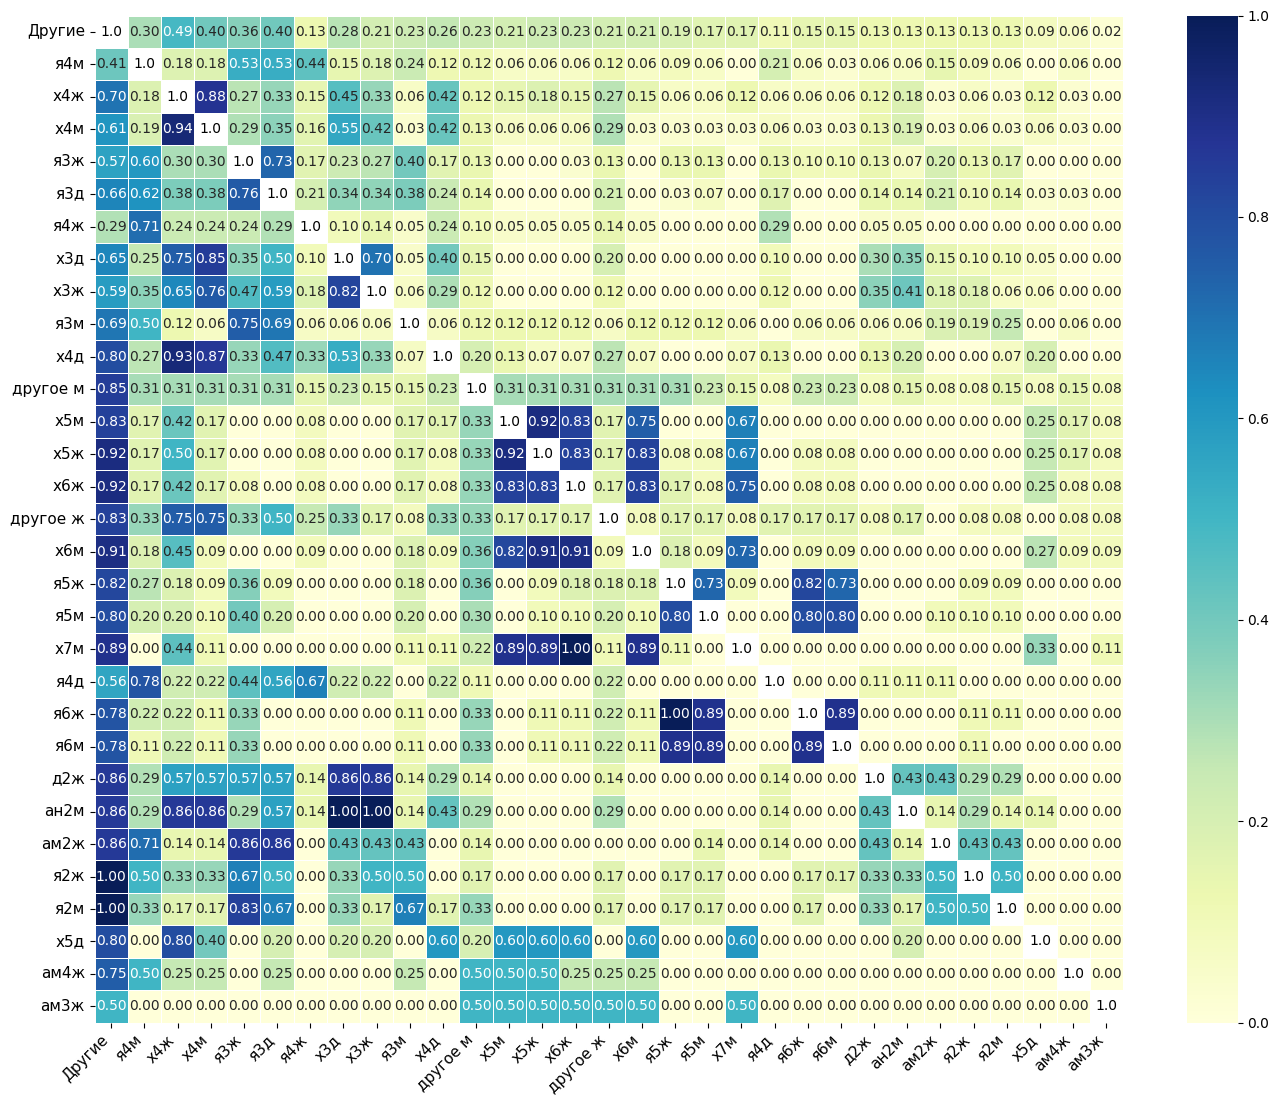

In [242]:
rows_cols = len(sorted_metres)
for_diagonal = np.eye(rows_cols, rows_cols)
plt.figure(figsize = (14, 12))
ax = sns.heatmap(
    sorted_conditional_probability,
    mask = for_diagonal,
    annot = True,
    fmt = '.2f',
    cmap = 'YlGnBu',
    linewidths = 0.5,
    annot_kws = {'size': 10},
    vmin = 0,
    vmax = 1
)
for i in range(rows_cols):
  ax.text(i + 0.5, i + 0.5, '1.0', ha = 'center', va = 'center',
          fontsize = 10, color = 'black', bbox = dict(boxstyle = 'round,pad=0.3', edgecolor = 'none', facecolor = 'white', alpha = 0.7))
x_labels = sorted_metres
y_labels = sorted_metres
plt.xticks(rotation = 45, ha = 'right', fontsize = 11)
plt.yticks(fontsize = 11)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()